We are only working with $l=m=3$ mode in the calculations below. The field and its derivative have been calculated on the horizon.

The **_hi** in the cells below stands for higher resolution data.

# Gaussian with center 1.1

## Loading and extracting data

In [5]:
addpath('phd_work/projects/non_axisymmetric_hair/data_l3m3/loc11/TimeDAT')

infield_data = load('Psi0_0.dat');
der_infield_data = load('Psi0_1.dat');
der2_infield_data = load('Psi0_2.dat');
outfield_data = load('Psi4_0.dat');
der_outfield_data = load('Psi4_1.dat');
der2_outfield_data = load('Psi4_2.dat');

infield_data_hi = load('Psi0_0hi.dat');
der_infield_data_hi = load('Psi0_1hi.dat');
der2_infield_data_hi = load('Psi0_2hi.dat');

time_infield = infield_data(:,1);
real_infield = infield_data(:,2);
imag_infield = infield_data(:,3);
real_der_infield = der_infield_data(:,2);
imag_der_infield = der_infield_data(:,3);
real_der2_infield = der2_infield_data(:,2);
imag_der2_infield = der2_infield_data(:,3);

time_infield_hi = infield_data_hi(:,1);
real_infield_hi = infield_data_hi(:,2);
imag_infield_hi = infield_data_hi(:,3);
real_der_infield_hi = der_infield_data_hi(:,2);
imag_der_infield_hi = der_infield_data_hi(:,3);
real_der2_infield_hi = der2_infield_data_hi(:,2);
imag_der2_infield_hi = der2_infield_data_hi(:,3);

time_outfield = outfield_data(:,1);
real_outfield = outfield_data(:,2);
imag_outfield = outfield_data(:,3);
real_der_outfield = der_outfield_data(:,2);
imag_der_outfield = der_outfield_data(:,3);
real_der2_outfield = der2_outfield_data(:,2);
imag_der2_outfield = der2_outfield_data(:,3);

rmpath('phd_work/projects/non_axisymmetric_hair/data_l3m3/loc11/TimeDAT')

In [ ]:
%test to verify that data is loaded correctly
%plot(time_infield,real_infield)
%length(real_outfield)

time_infield(1:50)
time_infield_hi(1:50)

## Defining fields and their derivatives

In [18]:
Psi0 = real_infield + 1i.*imag_infield;
Psi4 = real_outfield + 1i.*imag_outfield;

Psi0_hi = real_infield_hi + 1i.*imag_infield_hi;

der_Psi0 = real_der_infield + 1i.*imag_der_infield;
der_Psi4 = real_der_outfield + 1i.*imag_der_outfield;

der_Psi0_hi = real_der_infield_hi + 1i.*imag_der_infield_hi;

der2_Psi0 = real_der2_infield + 1i.*imag_der2_infield;
der2_Psi4 = real_der2_outfield + 1i.*imag_der2_outfield;

der2_Psi0_hi = real_der2_infield_hi + 1i.*imag_der2_infield_hi;

bbscalar_11 = Psi0.*Psi4;
bbscalar_11_hi = Psi0_hi(1:2:end).*Psi4;
hair = abs(Psi0.*der_Psi4 + Psi4.*der_Psi0);
hair_hi = abs(Psi0_hi(1:2:end).*der_Psi4 + Psi4.*der_Psi0_hi(1:2:end))
%tder_hair_11 = (hair_11(2:end) - hair_11(1:end-1))./(time_infield(2:end) - time_infield(1:end-1));

hair_hi = 29047x1 double
    0.0000
    0.5246
    1.7387
    2.9118
    3.3782
    3.0707
    3.3775
    5.7098
    9.0181
   12.3341
...

In [17]:
length(Psi0_hi)
length(Psi0_hi(1:2:end))
length(Psi4)

ans = 58093

ans = 29047

ans = 29047

## Finding the LPI of the fields and their derivatives

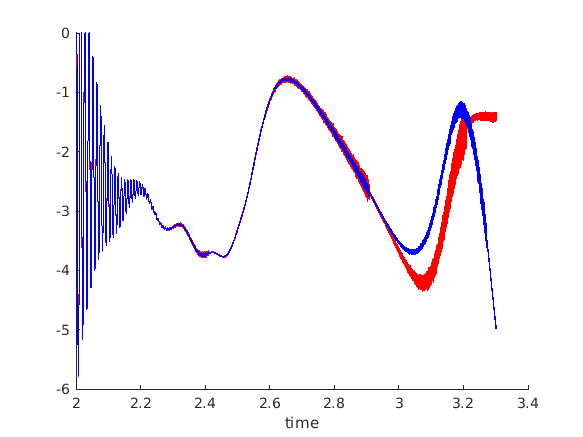

In [7]:
LPI_Psi0 = (log10(abs(Psi0(2:end))) - log10(abs(Psi0(1:end-1))))./(log10(time_infield(2:end)) - log10(time_infield(1:end-1)));
LPI_Psi0_hi = (log10(abs(Psi0_hi(2:end))) - log10(abs(Psi0_hi(1:end-1))))./(log10(time_infield_hi(2:end)) - log10(time_infield_hi(1:end-1)));
hold on
plot(log10(time_infield_hi(2:end)),LPI_Psi0_hi,'-r')
plot(log10(time_infield(2:end)),LPI_Psi0,'-b')
xlim([2,3.4])
ylim([-6,0])
xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
hold off

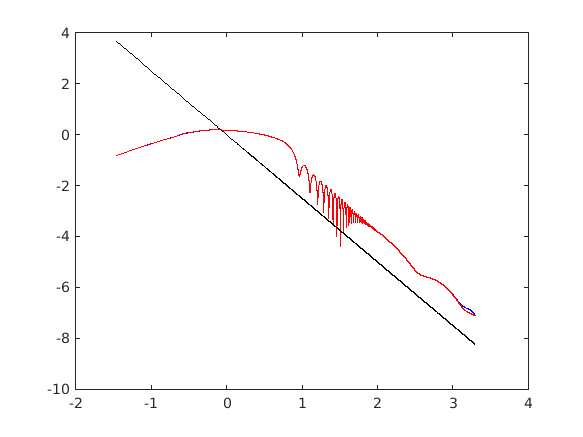

In [8]:
plot(log10(time_infield),log10(abs(Psi0)),'-b')
hold on
plot(log10(time_infield_hi),log10(abs(Psi0_hi)),'-r')
plot(log10(time_infield_hi),-2.5*log10(time_infield_hi),'-k')
hold off

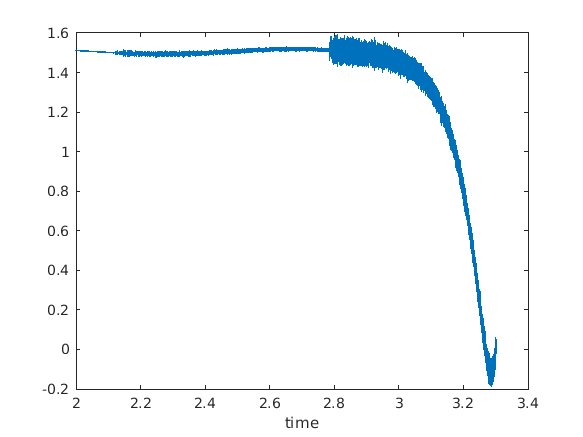

In [9]:
LPI_Psi4 = (log10(abs(Psi4(2:end))) - log10(abs(Psi4(1:end-1))))./(log10(time_infield(2:end)) - log10(time_infield(1:end-1)));
plot(log10(time_outfield(2:end)),LPI_Psi4)
xlim([2,3.4])
xlabel('time')

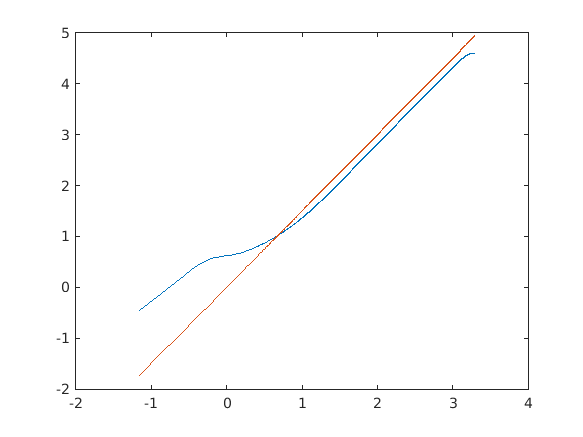

In [10]:
plot(log10(time_outfield),log10(abs(Psi4)))
%xlim([3,3.4])
hold on
plot(log10(time_outfield),1.5*log10(time_outfield))
%xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
hold off

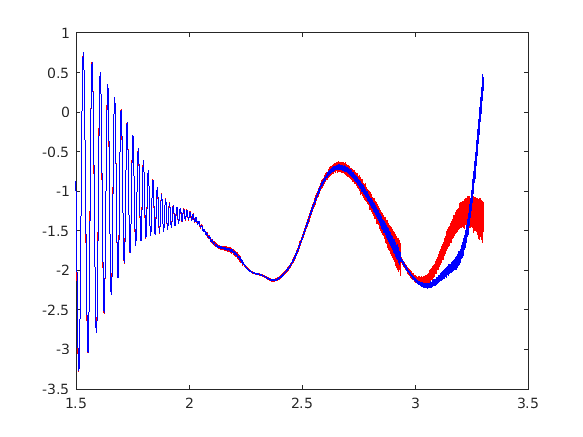

In [11]:
LPI_der_Psi0 = (log10(abs(der_Psi0(2:end))) - log10(abs(der_Psi0(1:end-1))))./(log10(time_infield(2:end)) - log10(time_infield(1:end-1)));
LPI_der_Psi0_hi = (log10(abs(der_Psi0_hi(2:end))) - log10(abs(der_Psi0_hi(1:end-1))))./(log10(time_infield_hi(2:end)) - log10(time_infield_hi(1:end-1)));
plot(log10(time_infield_hi(2:end)),LPI_der_Psi0_hi,'-r')
hold on
plot(log10(time_infield(2:end)),LPI_der_Psi0,'-b')
xlim([1.5,3.5])
hold off

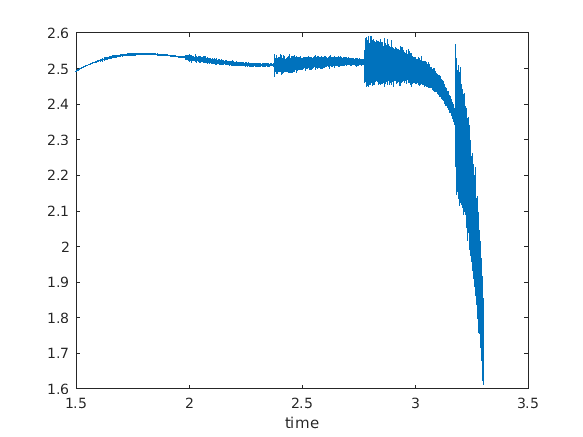

In [16]:
%hold on
LPI_der_Psi4 = (log10(abs(der_Psi4(2:end))) - log10(abs(der_Psi4(1:end-1))))./(log10(time_infield(2:end)) - log10(time_infield(1:end-1)));
plot(log10(time_outfield(2:end)),LPI_der_Psi4)
xlim([1.5,3.5])
%plot(log10(time_infield),log10(abs(der_Psi0)))
%ylim([30,50])
xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

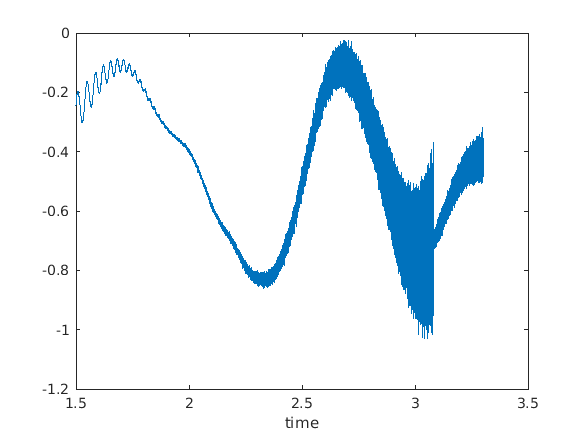

In [15]:
%hold on
LPI_der2_Psi0 = (log10(abs(der2_Psi0(2:end))) - log10(abs(der2_Psi0(1:end-1))))./(log10(time_infield(2:end)) - log10(time_infield(1:end-1)));
plot(log10(time_infield(2:end)),LPI_der2_Psi0)
xlim([1.5,3.5])
%plot(log10(time_infield),log10(abs(der_Psi0)))
%ylim([30,50])
%xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off
%plot(log10(time_infield),log10(abs(der_Psi4)))
%ylim([30,50])
xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

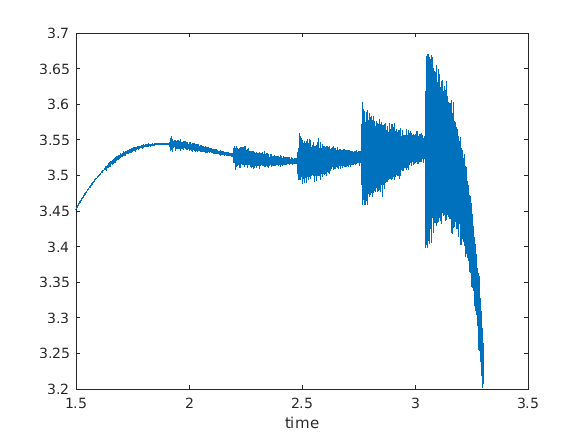

In [23]:
%hold on
%hold on
LPI_der2_Psi4 = (log10(abs(der2_Psi4(2:end))) - log10(abs(der2_Psi4(1:end-1))))./(log10(time_infield(2:end)) - log10(time_infield(1:end-1)));
plot(log10(time_infield(2:end)),LPI_der2_Psi4)
xlim([1.5,3.5])
%plot(log10(time_infield),log10(abs(der_Psi0)))
%ylim([30,50])
xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off
%plot(log10(time_infield),log10(abs(der2_Psi0)))
%xlim([3,3.5])
%xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

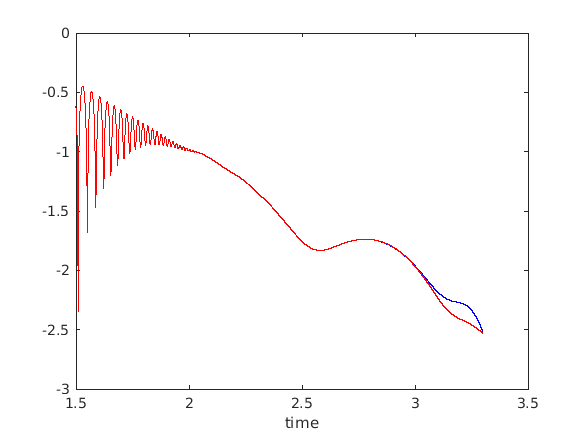

In [21]:
%hold on
plot(log10(time_infield),log10(abs(bbscalar_11)),'-b')
hold on
plot(log10(time_infield),log10(abs(bbscalar_11_hi)),'-r')
%plot(log10(time_infield),-1.*log10(time_infield))
hold off
xlim([1.5,3.5])
xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

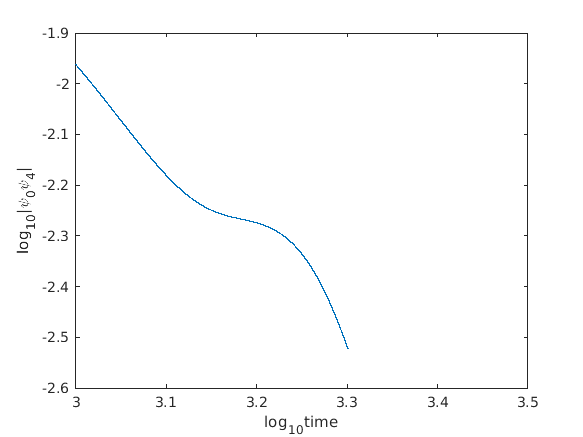

In [11]:

plot(log10(time_infield),log10(abs(bbscalar_11)))
%hold on
%plot(log10(time_infield(end-45647:end)),-1.0*log10(time_infield(end-45647:end))+1.25)
%hold off
xlim([3,3.5])
xlabel('log_{10}time')
ylabel('log_{10}|\psi_{0}\psi_{4}|')

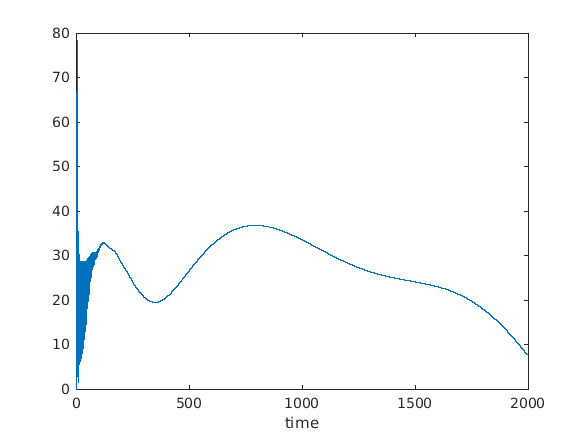

In [33]:
%hold on
plot(time_infield,hair_11)
%ylim([30,50])
xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

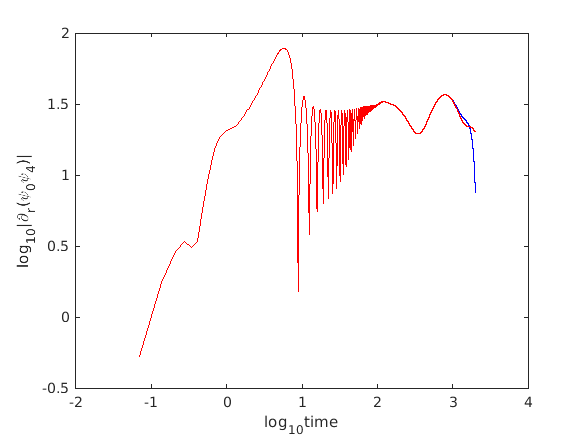

In [25]:
plot(log10(time_infield),log10(hair),'-b')
hold on
plot(log10(time_infield),log10(hair_hi),'-r')
%ylim([30,50])
xlabel('log_{10}time')
ylabel('log_{10}|\partial_{r}(\psi_{0}\psi_{4})|')
hold off

In [ ]:
%hold on
plot(time_infield(2:end),der_hair_11)
ylim([-50,90])
xlabel('time')
ylabel('\partial_{t}|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

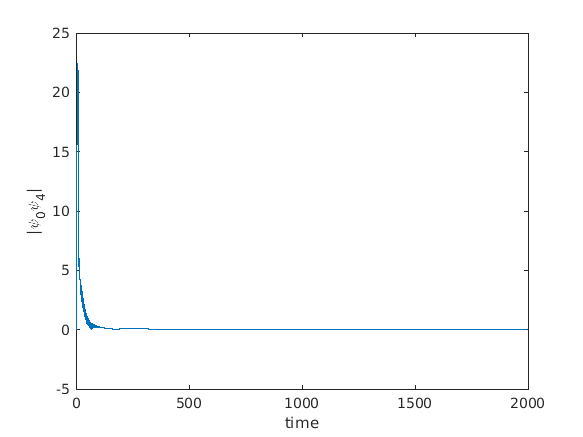

In [16]:
%hold off
plot(time_infield,abs(bbscalar))
ylim([-5,25])
xlabel('time')
ylabel('|\psi_{0}\psi_{4}|')

# Gaussian with center 1.2

In [1]:
addpath('phd_work/projects/non-axisymmetric-hair/data_l3m3/loc12/TimeDAT')
infield_data = load('Psi0_0.dat');
der_infield_data = load('Psi0_1.dat');
der2_infield_data = load('Psi0_2.dat');
outfield_data = load('Psi4_0.dat');
der_outfield_data = load('Psi4_1.dat');
der2_outfield_data = load('Psi4_2.dat');

time_infield = infield_data(:,1);
real_infield = infield_data(:,2);
imag_infield = infield_data(:,3);
real_der_infield = der_infield_data(:,2);
imag_der_infield = der_infield_data(:,3);
real_der2_infield = der2_infield_data(:,2);
imag_der2_infield = der2_infield_data(:,3);

time_outfield = outfield_data(:,1);
real_outfield = outfield_data(:,2);
imag_outfield = outfield_data(:,3);
real_der_outfield = der_outfield_data(:,2);
imag_der_outfield = der_outfield_data(:,3);
real_der2_outfield = der2_outfield_data(:,2);
imag_der2_outfield = der2_outfield_data(:,3);

rmpath('phd_work/projects/non-axisymmetric-hair/data_l3m3/loc12/TimeDAT')

In [2]:
Psi0 = real_infield + 1i.*imag_infield;
Psi4 = real_outfield + 1i.*imag_outfield;

der_Psi0 = real_der_infield + 1i.*imag_der_infield;
der_Psi4 = real_der_outfield + 1i.*imag_der_outfield;

der2_Psi0 = real_der2_infield + 1i.*imag_der2_infield;
der2_Psi4 = real_der2_outfield + 1i.*imag_der2_outfield;

bbscalar_12 = Psi0.*Psi4;
%hair_new = abs(Psi0.*der2_Psi4 + Psi4.*der2_Psi0 + 2*der_Psi0.*der_Psi4);
hair_old = abs(Psi0.*der_Psi4 + Psi4.*der_Psi0);
%tder_hair_11 = (hair_11(2:end) - hair_11(1:end-1))./(time_infield(2:end) - time_infield(1:end-1));

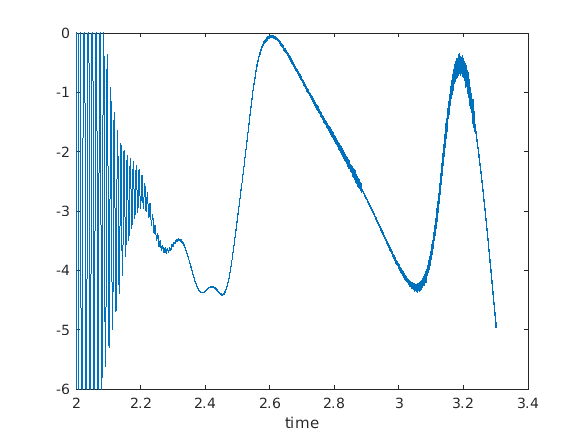

In [3]:
LPI_Psi0 = (log10(abs(Psi0(2:end))) - log10(abs(Psi0(1:end-1))))./(log10(time_infield(2:end)) - log10(time_infield(1:end-1)));
%hold on
%plot(log10(time_infield),log10(abs(Psi0)))
plot(log10(time_infield(2:end)),LPI_Psi0)
xlim([2,3.4])
ylim([-6,0])
xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

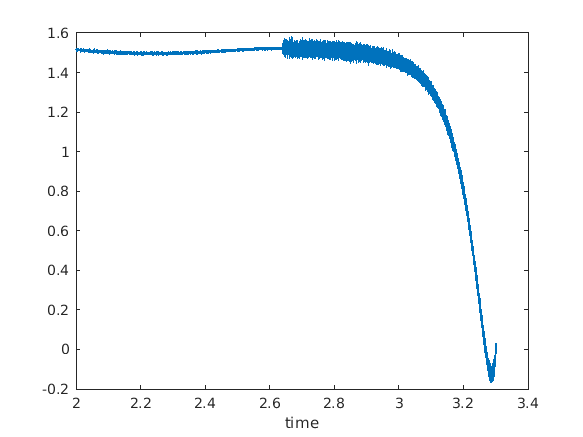

In [4]:
LPI_Psi4 = (log10(abs(Psi4(2:end))) - log10(abs(Psi4(1:end-1))))./(log10(time_infield(2:end)) - log10(time_infield(1:end-1)));
%hold on
plot(log10(time_infield(2:end)),LPI_Psi4)
xlim([2,3.4])
xlabel('time')
%plot(log10(time_infield),log10(abs(Psi4)))
%xlim([3,3.4])
%xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

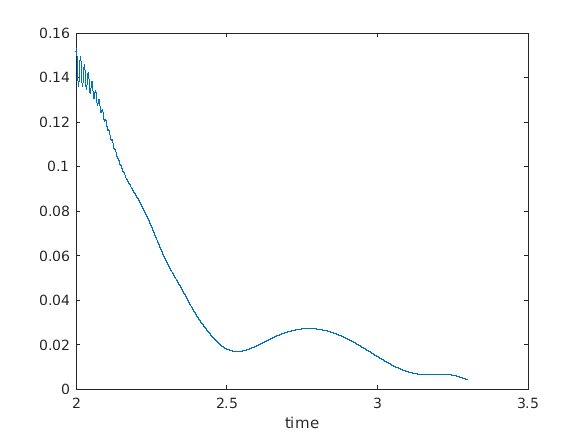

In [10]:
%hold on
plot(log10(time_infield),abs(bbscalar_12))
xlim([2,3.5])
xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

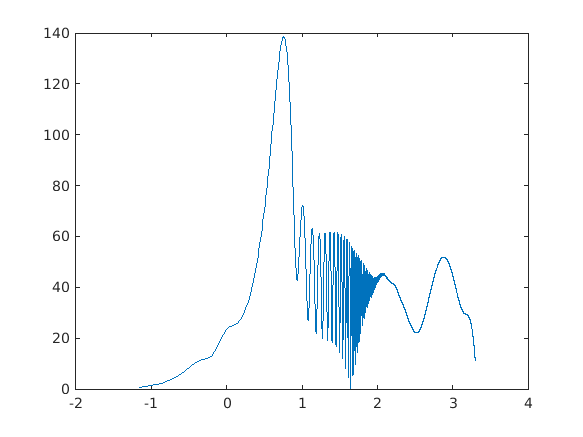

In [13]:
plot(log10(time_infield(1:end)),hair_old)

# Gaussian with center 1.3

In [25]:
addpath('phd_work/projects/non-axisymmetric-hair/old_data/loc13')
infield_data = load('Psi0_TimeDAT_0.dat');
der_infield_data = load('Psi0_TimeDAT_1.dat');
outfield_data = load('Psi4_TimeDAT_0.dat');
der_outfield_data = load('Psi4_TimeDAT_1.dat');

time_infield = infield_data(1:51000,1);
real_infield = infield_data(1:51000,2);
imag_infield = infield_data(1:51000,3);
real_der_infield = der_infield_data(1:51000,2);
imag_der_infield = der_infield_data(1:51000,3);

time_outfield = outfield_data(1:51000,1);
real_outfield = outfield_data(1:51000,2);
imag_outfield = outfield_data(1:51000,3);
real_der_outfield = der_outfield_data(1:51000,2);
imag_der_outfield = der_outfield_data(1:51000,3);

rmpath('phd_work/projects/non-axisymmetric-hair/old_data/loc13')

In [26]:
Psi0 = real_infield + 1i.*imag_infield;
Psi4 = real_outfield + 1i.*imag_outfield;
der_Psi0 = real_der_infield + 1i.*imag_der_infield;
der_Psi4 = real_der_outfield + 1i.*imag_der_outfield;
bbscalar_13 = Psi0.*Psi4;
hair_13 = abs(Psi0.*der_Psi4 + Psi4.*der_Psi0);
der_hair_13 = (hair_13(2:end) - hair_13(1:end-1))./(time_infield(2:end) - time_infield(1:end-1));

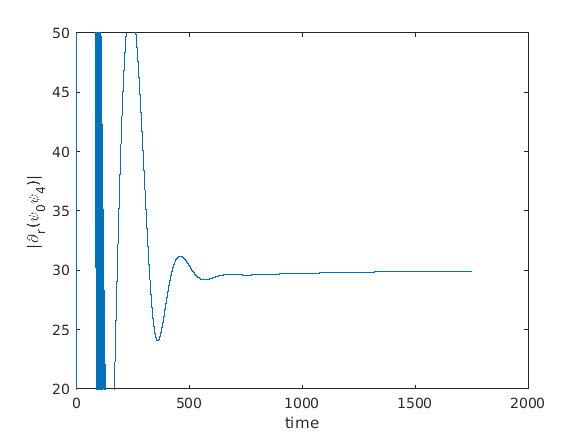

In [34]:
%hold on
plot(time_infield,hair_13)
ylim([20,50])
xlabel('time')
ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

# Gaussian with center 1.4

In [29]:
addpath('phd_work/projects/non-axisymmetric-hair/old_data/loc14')
infield_data = load('Psi0_TimeDAT_0.dat');
der_infield_data = load('Psi0_TimeDAT_1.dat');
outfield_data = load('Psi4_TimeDAT_0.dat');
der_outfield_data = load('Psi4_TimeDAT_1.dat');

time_infield = infield_data(1:51000,1);
real_infield = infield_data(1:51000,2);
imag_infield = infield_data(1:51000,3);
real_der_infield = der_infield_data(1:51000,2);
imag_der_infield = der_infield_data(1:51000,3);

time_outfield = outfield_data(1:51000,1);
real_outfield = outfield_data(1:51000,2);
imag_outfield = outfield_data(1:51000,3);
real_der_outfield = der_outfield_data(1:51000,2);
imag_der_outfield = der_outfield_data(1:51000,3);

rmpath('phd_work/projects/non-axisymmetric-hair/old_data/loc14')

In [30]:
Psi0 = real_infield + 1i.*imag_infield;
Psi4 = real_outfield + 1i.*imag_outfield;
der_Psi0 = real_der_infield + 1i.*imag_der_infield;
der_Psi4 = real_der_outfield + 1i.*imag_der_outfield;
bbscalar_14 = Psi0.*Psi4;
hair_14 = abs(Psi0.*der_Psi4 + Psi4.*der_Psi0);
der_hair_14 = (hair_14(2:end) - hair_14(1:end-1))./(time_infield(2:end) - time_infield(1:end-1));

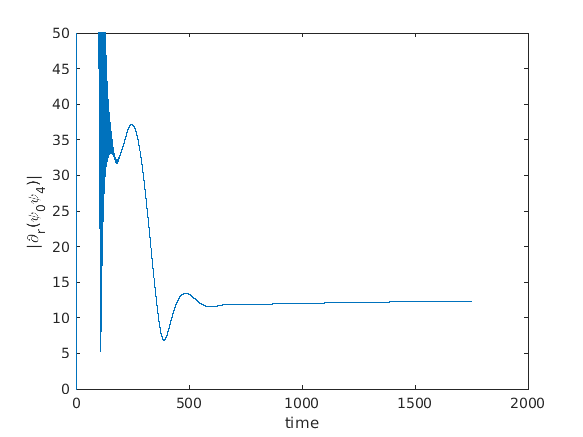

In [35]:
%hold on
plot(time_infield,hair_14)
ylim([0,50])
xlabel('time')
ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

In [12]:
whos

  Name                       Size              Bytes  Class     Attributes

  Psi0                   51350x1              821600  double    complex   
  Psi4                   58093x1              929488  double    complex   
  bbscalar               58093x1              929488  double    complex   
  der_Psi0               51307x1              820912  double    complex   
  der_Psi4               58093x1              929488  double    complex   
  der_hair               58092x1              464736  double              
  der_infield_data       51307x7             2873192  double              
  der_outfield_data      58093x7             3253208  double              
  hair                   58093x1              464744  double              
  imag_der_infield       51307x1              410456  double              
  imag_der_outfield      58093x1              464744  double              
  imag_infield           51350x1              410800  double              
  imag_outfield         